## ML LAB 07 - Aug 26, 2020 | Aaqib Ahmad (1947101)

1. Using **Breast Cancer Wisconsin (Diagnostic) Data Set** for Performance Comparison betwenn KNN and Logistic Regression
2. For Logistic Regression, Checking Performance **(a) With Regularization** and **(b) Without Regularization**

### Logistic Regression - A Brief Intro

- Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. 
- Logistic regression is most commonly used when the data in question has binary output. 
- Which means, it belongs to one class or another, or is either a 0 or 1.

<img src ='image_lr.PNG'>

#### Importing Libraries and Packages

In [1]:
#Importing essential packages and modules
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter('ignore')

#### Loading and Viewing Data Set

In [2]:
#Loading the dataset 
brstcancer_data = pd.read_csv('data.csv', index_col=False,)

In [3]:
#To print first few values
brstcancer_data.drop('Unnamed: 0', axis=1, inplace=True)
brstcancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Print shape of the dataset
brstcancer_data.shape

(569, 31)

#### Checking for "null" values in the Dataset

In [5]:
brstcancer_data.isnull().values.any() 

False

#### Feature Frequency Count (M) or (B) and Visualization

In [6]:
pd.crosstab(index = brstcancer_data['diagnosis'], columns = 'count')

col_0,count
diagnosis,
B,357
M,212


Number of cells labeled Benign    :  357
Number of cells labeled Malignant :  212

% of cells labeled Benign         :  62.74 %
% of cells labeled Malignant      :  37.26 %


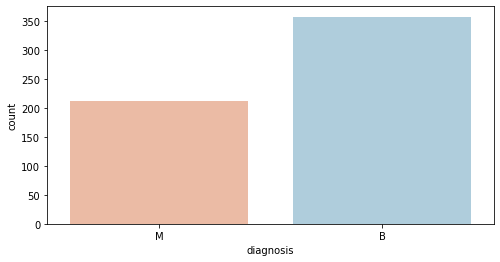

In [7]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(brstcancer_data['diagnosis'], palette='RdBu')

# count number of observations in each class
benign, malignant = brstcancer_data['diagnosis'].value_counts()
print('Number of cells labeled Benign    : ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign         : ', round(benign / len(brstcancer_data) * 100, 2), '%')
print('% of cells labeled Malignant      : ', round(malignant / len(brstcancer_data) * 100, 2), '%')

#### 5 Point Summary - Statistical Information

In [8]:
brstcancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Violin Plot for Feature Understanding
- Using Violin Plot to check Features Relationship of **Malignant** and **Benign** Cancer Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

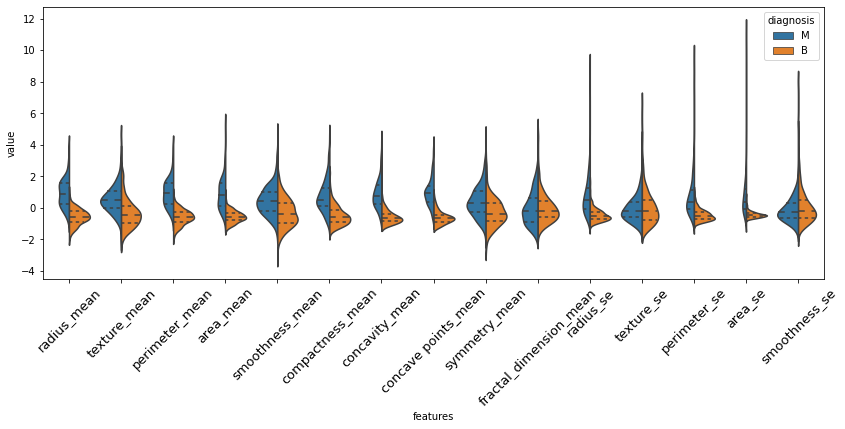

In [9]:
import seaborn as sns
data_dia = brstcancer_data['diagnosis']
data = brstcancer_data.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([brstcancer_data['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

### 4. Splitting the dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = brstcancer_data.values[:, 1:31]
Y = brstcancer_data.values[:,0]

#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
accuracy = []

### Logistic Regression Implementation (using sklearn)

1. Initialize the Model
2. Fitting the model for the train data
3. Prediction of test data
4. Calculation of the Accuracy

In [13]:
#Initializing the model
model_1 = LogisticRegression()

In [14]:
#Fitting the model for the train data
model_1.fit(x_train, y_train)

LogisticRegression()

In [15]:
#Predicting for the unseen data
predict_1 = model_1.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Precision -> Ratio of Correctly Predicted Positive Observations to the Total Predicted Positive Observations
Recall    -> Ratio of Correctly Predicted Positive Observations to the All Observations in Actual Class
f1-Score  -> Weighted Average of Precision and Recall
Support   -> It is the number of occurrences of each class in - y_true


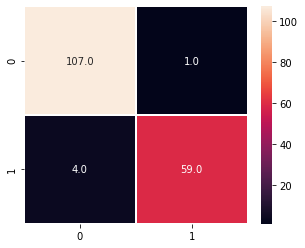

In [16]:
from sklearn import metrics

#Clasification report
results_rl=metrics.classification_report(y_true=y_test, y_pred=predict_1)
print(results_rl)

#Confusion matrix
print("Precision -> Ratio of Correctly Predicted Positive Observations to the Total Predicted Positive Observations")
print("Recall    -> Ratio of Correctly Predicted Positive Observations to the All Observations in Actual Class")
print("f1-Score  -> Weighted Average of Precision and Recall")
print("Support   -> It is the number of occurrences of each class in - y_true")
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=predict_1)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [17]:
#Calculating the accuracy of the model
acc=accuracy_score(y_test, predict_1)
print("The Accuracy of the Logistic Regression is found as : ")
accuracy.append(int(acc*100))
acc

The Accuracy of the Logistic Regression is found as : 


0.9707602339181286

### KNN Implementation (using sklearn)

1. Initialize the Model
2. Fitting the model for the train data
3. Prediction of test data
4. Calculation of the Accuracy
5. Find the Best k-Values

In [18]:
#Initializing the model
model_2 = KNeighborsClassifier(n_neighbors = 30)

In [19]:
#Fitting the model for the train data
model_2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [20]:
#Predicting for the unseen/test data
predict_2 = model_2.predict(x_test)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       108
           1       0.98      0.86      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171

Precision -> Ratio of Correctly Predicted Positive Observations to the Total Predicted Positive Observations
Recall    -> Ratio of Correctly Predicted Positive Observations to the All Observations in Actual Class
f1-Score  -> Weighted Average of Precision and Recall
Support   -> It is the number of occurrences of each class in - y_true


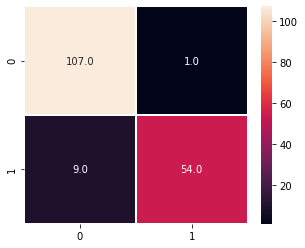

In [21]:
from sklearn import metrics

# Clasification report
results_knn=metrics.classification_report(y_true=y_test, y_pred=predict_2)
print(results_knn)

# Confusion matrix
cm_knn= metrics.confusion_matrix(y_true=y_test, y_pred=predict_2)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);
print("Precision -> Ratio of Correctly Predicted Positive Observations to the Total Predicted Positive Observations")
print("Recall    -> Ratio of Correctly Predicted Positive Observations to the All Observations in Actual Class")
print("f1-Score  -> Weighted Average of Precision and Recall")
print("Support   -> It is the number of occurrences of each class in - y_true")

In [22]:
#Calculating the accuracy of the model
acc2=accuracy_score(y_test, predict_2)
print("The Accuracy of the KNN Classifier is found as : ")
accuracy.append(int(acc2*100))
acc2
print("With {} NN Score: {}".format(30,model_2.score(x_test,y_test)))

The Accuracy of the KNN Classifier is found as : 
With 30 NN Score: 0.9415204678362573


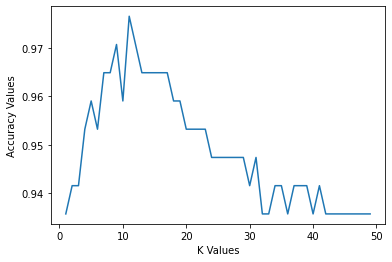

In [23]:
# Find Best K Value
score_list = []
for each in range(1,50):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(x_train, y_train)
    score_list.append(knn_2.score(x_test,y_test))

plt.plot(range(1,50), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy Values")
plt.show()

## Comparison of Accuracy Values (LR and KNN)

#### Bar Graph Comparison of  Accuracy Values

Text(0.5, 1.0, 'Accuracies of Models')

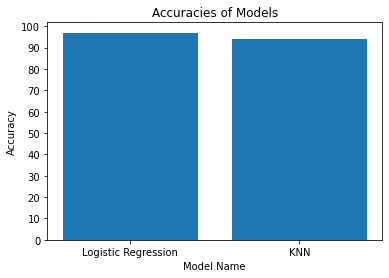

In [24]:
Index = [1,2]
name=["Logistic Regression", "KNN"]
accuracy = [97,94]
plt.bar(Index, accuracy)
plt.xticks(Index, name, rotation=0)
plt.yticks(np.arange(0, 105, 10)) 
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.title('Accuracies of Models')

#### Cross - Validations Values Comparison

In [25]:
from sklearn.model_selection import cross_val_score, KFold
# Spot-Check Algorithms
print('-> 10-Fold Cross-Validation Accurcay Score for the Training Data for Two Classifiers')
print('===============================================================================')
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'KNN' , KNeighborsClassifier()))


# Test options and evaluation metric
num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
for name, model in models:
 #kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 kfold = KFold(n_splits=4, random_state=seed, shuffle=False)
 cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 print("Accuracies For : ",name)
 print(cv_results)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 print('===============================================================================')

-> 10-Fold Cross-Validation Accurcay Score for the Training Data for Two Classifiers
Accuracies For :  LR
[0.94       0.96       0.95959596 0.8989899 ]
LR: 0.939646 (0.024826)
Accuracies For :  KNN
[0.93       0.92       0.8989899  0.90909091]
KNN: 0.914520 (0.011622)


#### Accuracy Values at : First 4 - Iterations using LR

Text(0.5, 1.0, 'Comparison of Accuracy for each Iteration in Logistic Regression')

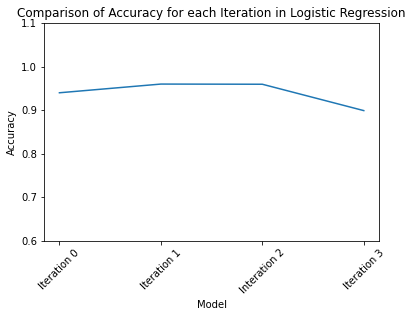

In [26]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
pylt.plot(Index,results[0])
pylt.xticks(Index, name, rotation=45)
pylt.yticks(np.arange(0.6, 1.2, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of Accuracy for each Iteration in Logistic Regression')

#### Accuracy Values at : First 4 - Iterations using KNN

Text(0.5, 1.0, 'Comparison of accuracy for each Iteration in KNN')

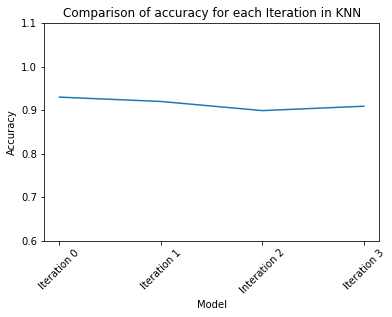

In [27]:
import matplotlib.pyplot as pylt 
Index = [1,2,3,4]
name=["Iteration 0","Iteration 1","Interation 2","Iteration 3"]
pylt.plot(Index,results[1])
pylt.xticks(Index, name, rotation=45)
pylt.yticks(np.arange(0.6, 1.2, 0.1)) 
pylt.ylabel('Accuracy')
pylt.xlabel('Model')
pylt.title('Comparison of accuracy for each Iteration in KNN')

#### Accuracy Value's Range Comparison for LR and KNN - Boxplot

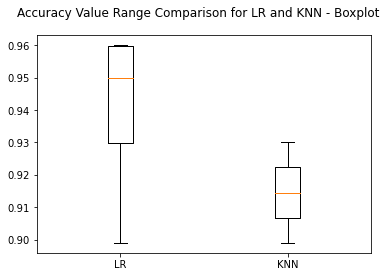

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Accuracy Value Range Comparison for LR and KNN - Boxplot' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Logistic Regression without Regularization

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [31]:
# Main Target Features to find in this dataset
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)

In [34]:
print(np.shape(X_train))
print(np.shape(X_test))

(426, 30)
(143, 30)


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
Lgr=LogisticRegression().fit(X_train,y_train) 

In [37]:
print("The Accuracy Score of The Training Model (LR) (without Regularization)")
Lgr.score(X_train,y_train)*100

The Accuracy Score of The Training Model (LR) (without Regularization)


94.13145539906104

#### The Model (without Regularization) is able to make ~ 94% predictions accurately

### Now Using Regularized Logistic Regression (L1) / Lasso (by changing C-Value)

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

In [38]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [39]:
C = [10, 1, 0.1, 0.001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear') 
    #Liblinear Solver -----> efficiently optimize for the Logistic Regression loss with a non-smooth, sparsity inducing l1 penalty.
    clf.fit(X_train, y_train)
    print('C:', c)
    #print('Coefficient of each feature:', clf.coef_)
    print('Training Accuracy :', clf.score(X_train, y_train))
    print('Testing Accuracy :', clf.score(X_test, y_test))
    print('=======================================================')

C: 10
Training Accuracy : 0.971830985915493
Testing Accuracy : 0.965034965034965
C: 1
Training Accuracy : 0.9553990610328639
Testing Accuracy : 0.965034965034965
C: 0.1
Training Accuracy : 0.9272300469483568
Testing Accuracy : 0.951048951048951
C: 0.001
Training Accuracy : 0.9131455399061033
Testing Accuracy : 0.9370629370629371


- As we can see from when C = 10 until at C = 0.001 all the coefficients are zero. 
- This is the effect of the regularization penalty becoming more prominent.

### Now Using Regularized Logistic Regression (L2)

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. 

In [52]:
C = [10, 1, 0.1, 0.001]

for c in C:
    clf = LogisticRegression(penalty='l2',C=c, max_iter=10000)
    clf.fit(X_train, y_train)
    print('===========================================')
    print('Training Accuracy :', clf.score(X_train, y_train))
    print('Test Accuracy     :', clf.score(X_test, y_test))
    print('===========================================')

Training Accuracy : 0.971830985915493
Test Accuracy     : 0.965034965034965
Training Accuracy : 0.9553990610328639
Test Accuracy     : 0.972027972027972
Training Accuracy : 0.9483568075117371
Test Accuracy     : 0.965034965034965
Training Accuracy : 0.9460093896713615
Test Accuracy     : 0.9440559440559441


The key difference between these techniques is that:
- Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. 
- So, this works well for feature selection in case we have a huge number of features.
- Methods like cross-validation to handle overfitting and perform feature selection work well with a small set of features.

===================================================================================== ML_LAB_07 | Aaqib Ahmad (1947101)